In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def load_data(folder_path):
    data = []
    labels = []
    
    for label, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)

            # Check if the image is successfully read
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize images to a common size
                data.append(img)
                labels.append(label)
    
    return np.array(data), np.array(labels)

# Load training and testing data
train_data, train_labels = load_data("My_data/train")
test_data, test_labels = load_data("My_data/test")

# Normalize pixel values to be between 0 and 1
train_data, test_data = train_data / 255.0, test_data / 255.0


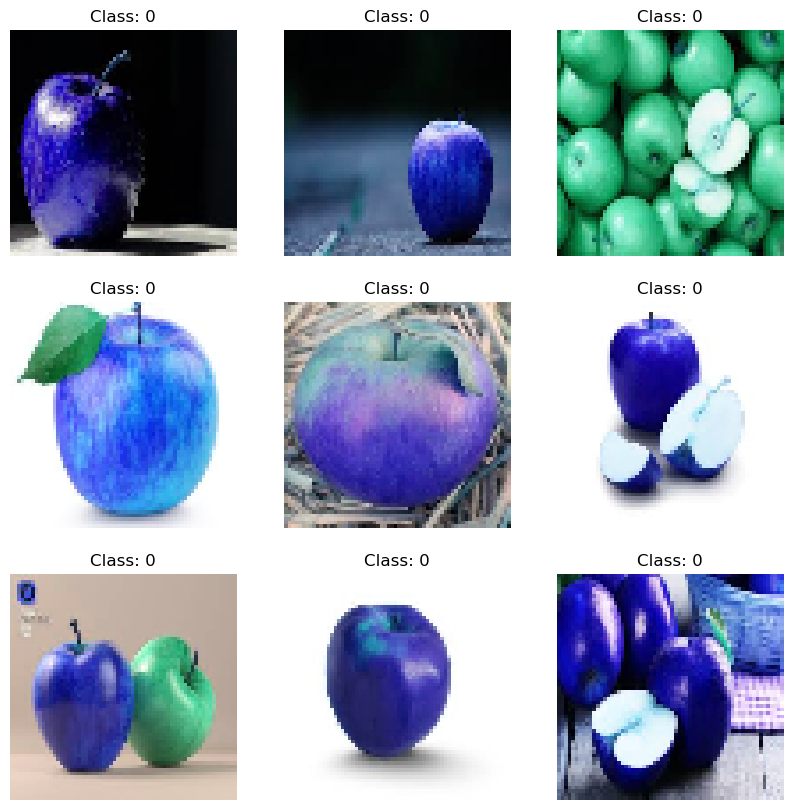

In [3]:
# Plot sample images from the training data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_data[i])
    plt.title(f"Class: {train_labels[i]}")
    plt.axis("off")
plt.show()

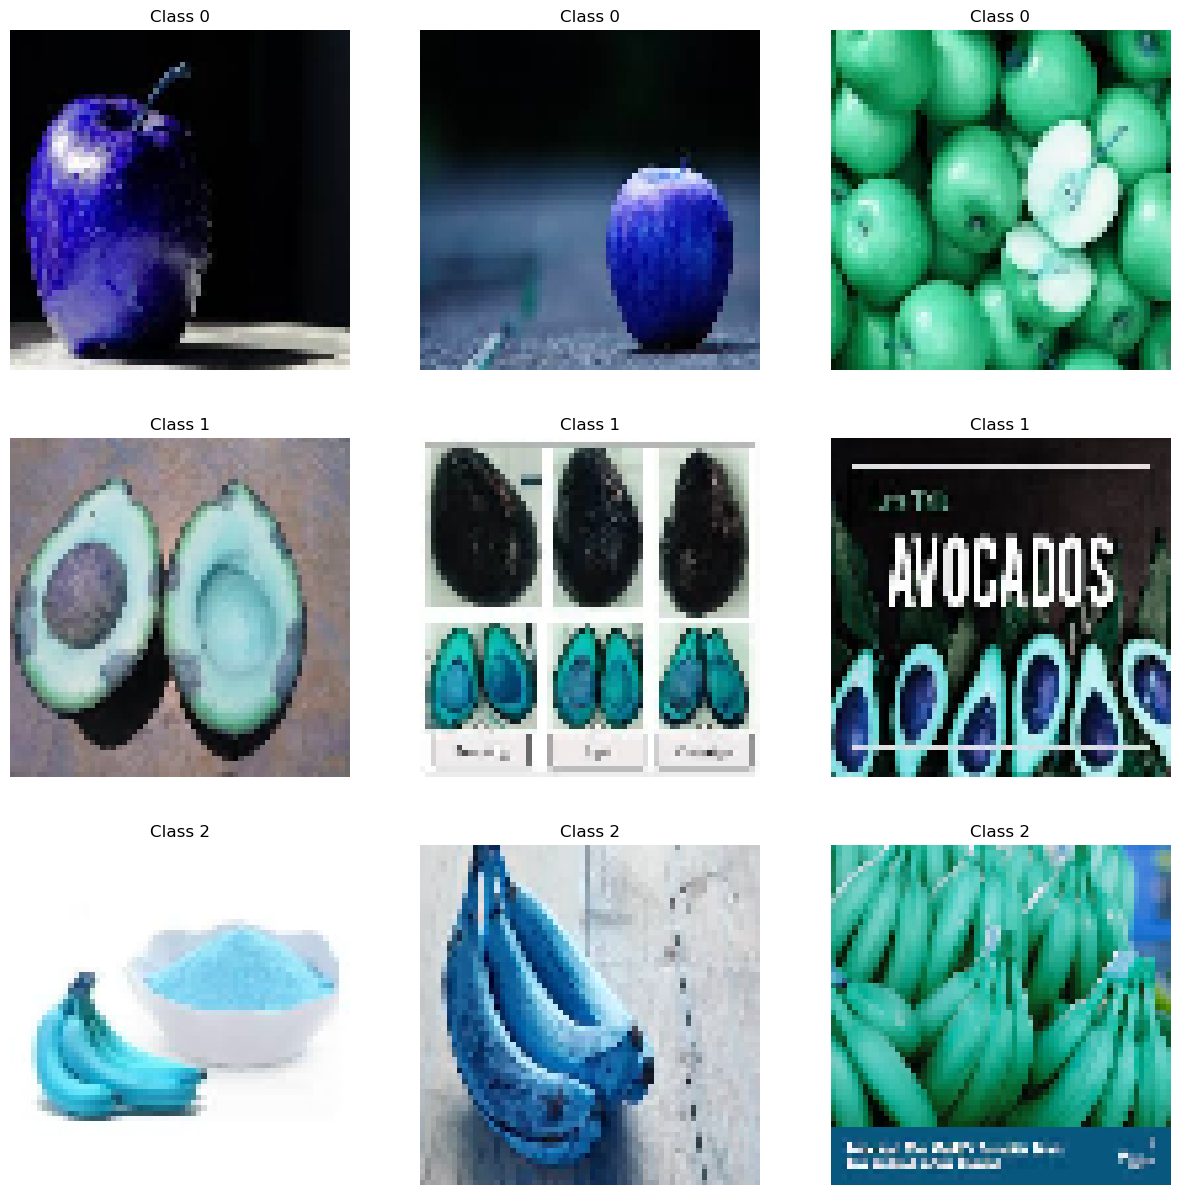

In [4]:
# Plot sample images from the training data (one image per class)
plt.figure(figsize=(15, 15))

classes_to_display = 3  # Adjust the number of classes to display

for i in range(classes_to_display):
    class_images = train_data[train_labels == i]
    
    plt.subplot(classes_to_display, 3, i*3 + 1)
    plt.imshow(class_images[0])
    plt.title(f"Class {i}")
    plt.axis("off")
    
    plt.subplot(classes_to_display, 3, i*3 + 2)
    plt.imshow(class_images[1])
    plt.title(f"Class {i}")
    plt.axis("off")
    
    plt.subplot(classes_to_display, 3, i*3 + 3)
    plt.imshow(class_images[2])
    plt.title(f"Class {i}")
    plt.axis("off")

plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=12, validation_data=(test_data, test_labels))


Epoch 1/12
72/72 [==============================] - 9s 108ms/step - loss: 1.8677 - accuracy: 0.2787 - val_loss: 1.6936 - val_accuracy: 0.3369
Epoch 2/12
72/72 [==============================] - 8s 107ms/step - loss: 1.4733 - accuracy: 0.4309 - val_loss: 1.4604 - val_accuracy: 0.4717
Epoch 3/12
72/72 [==============================] - 8s 109ms/step - loss: 1.2735 - accuracy: 0.5322 - val_loss: 1.4062 - val_accuracy: 0.4912
Epoch 4/12
72/72 [==============================] - 8s 106ms/step - loss: 1.1476 - accuracy: 0.5900 - val_loss: 1.3622 - val_accuracy: 0.5225
Epoch 5/12
72/72 [==============================] - 8s 114ms/step - loss: 1.0491 - accuracy: 0.6091 - val_loss: 1.3166 - val_accuracy: 0.5674
Epoch 6/12
72/72 [==============================] - 8s 116ms/step - loss: 0.9551 - accuracy: 0.6583 - val_loss: 1.2975 - val_accuracy: 0.5645
Epoch 7/12
72/72 [==============================] - 9s 123ms/step - loss: 0.7941 - accuracy: 0.7126 - val_loss: 1.3178 - val_accuracy: 0.5811
Epoch 

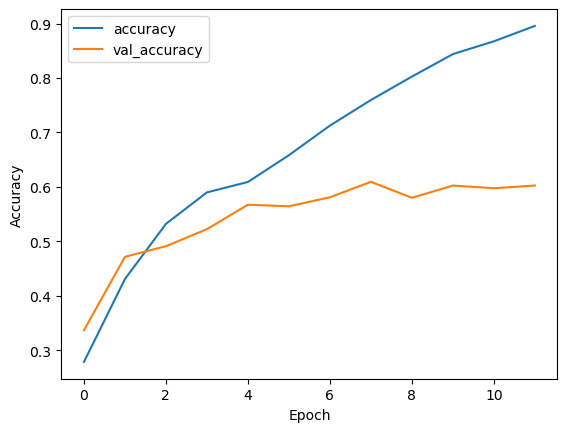

32/32 [==============================] - 1s 32ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        89
           1       0.62      0.46      0.53       105
           2       0.41      0.56      0.47       105
           3       0.63      0.79      0.70       105
           4       0.61      0.59      0.60       105
           5       0.45      0.24      0.31       105
           6       0.67      0.84      0.74        97
           7       0.66      0.84      0.74       105
           8       0.68      0.51      0.59       103
           9       0.65      0.51      0.57       105

    accuracy                           0.60      1024
   macro avg       0.60      0.61      0.59      1024
weighted avg       0.60      0.60      0.59      1024

Confusion Matrix:
 [[64  2  5  4  3  4  3  1  1  2]
 [ 0 48 21  0 15  9  0  5  0  7]
 [ 1  3 59  0  8  6  9 16  0  3]
 [ 7  1  0 83  0  0  3  2  7  2]
 [ 1 12 16  

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = np.argmax(model.predict(test_data), axis=1)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))


Epoch 1/30
72/72 [==============================] - 16s 202ms/step - loss: 2.2361 - accuracy: 0.1513 - val_loss: 2.0031 - val_accuracy: 0.2578
Epoch 2/30
72/72 [==============================] - 13s 184ms/step - loss: 1.9922 - accuracy: 0.2383 - val_loss: 1.7185 - val_accuracy: 0.3457
Epoch 3/30
72/72 [==============================] - 13s 174ms/step - loss: 1.9024 - accuracy: 0.2717 - val_loss: 1.7179 - val_accuracy: 0.3271
Epoch 4/30
72/72 [==============================] - 13s 175ms/step - loss: 1.7892 - accuracy: 0.3070 - val_loss: 1.5638 - val_accuracy: 0.3984
Epoch 5/30
72/72 [==============================] - 12s 168ms/step - loss: 1.7434 - accuracy: 0.3252 - val_loss: 1.5931 - val_accuracy: 0.4199
Epoch 6/30
72/72 [==============================] - 11s 158ms/step - loss: 1.6593 - accuracy: 0.3535 - val_loss: 1.5231 - val_accuracy: 0.3994
Epoch 7/30
72/72 [==============================] - 11s 157ms/step - loss: 1.6397 - accuracy: 0.3617 - val_loss: 1.4897 - val_accuracy: 0.4443

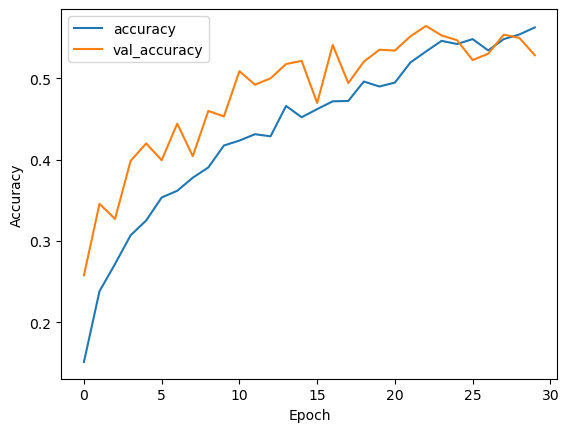

32/32 [==============================] - 1s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.21      0.31        89
           1       0.60      0.52      0.56       105
           2       0.55      0.27      0.36       105
           3       0.47      0.89      0.61       105
           4       0.67      0.54      0.60       105
           5       0.54      0.35      0.43       105
           6       0.77      0.91      0.83        97
           7       0.45      0.93      0.61       105
           8       0.27      0.29      0.28       103
           9       0.75      0.34      0.47       105

    accuracy                           0.53      1024
   macro avg       0.56      0.53      0.50      1024
weighted avg       0.56      0.53      0.51      1024

Confusion Matrix:
 [[19  5  0 23  2  4  2  4 28  2]
 [ 2 55  4  1  9  1  0 26  0  7]
 [ 1  2 28  1  9 19  3 40  0  2]
 [ 1  1  0 93  0  0  2  2  6  0]
 [ 4 13  7  

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Function to load images and labels
def load_data(folder_path):
    data = []
    labels = []
    
    for label, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, (64, 64))
                data.append(img)
                labels.append(label)
    
    return np.array(data), np.array(labels)

# Load training and testing data
train_data, train_labels = load_data("My_data/train")
test_data, test_labels = load_data("My_data/test")

# Normalize pixel values to be between 0 and 1
train_data, test_data = train_data / 255.0, test_data / 255.0

# Apply data augmentation to the training dataset
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_data)

# Build the CNN model with regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout for regularization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout for regularization
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(10, activation='softmax'))

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30, validation_data=(test_data, test_labels))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = np.argmax(model.predict(test_data), axis=1)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))